# 資料說明:

機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集

安隆公司曾是一間能源公司，2001 年破產前是世界上最大的電力、天然氣及電信公司之一。擁有上千億資產的公司於 2002 年竟然在短短幾周內宣告破產，才揭露其財報在多年以來均是造假的醜聞。在本資料集中你將會扮演偵探的角色，透過高層經理人內部的 mail 來往的情報以及薪資、股票等財務特徵，訓練出一個機器學習模型來幫忙你找到可疑的詐欺犯罪者是誰! 我們已經先幫你找到幾位犯罪者 (Person-of-Interest, poi) 與清白的員工，請利用這些訓練資料來訓練屬於自己的詐欺犯機器學習模型吧!

# 資料來源:

https://www.kaggle.com/c/2020-ml100marathon-midterm/data

# 關鍵問題:

參考:
https://docs.google.com/document/d/1XxV5_gN0E4oEYvk4ovYwepjNxCAMdAFqcSacHMrd7U0/edit?usp=sharing


# STEP1:載入套件 & 讀取資料

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
train = pd.read_csv('C:/Users/USER/Desktop/Github/ML100Days/Midtern Exam_Kaggle_Project/train_data.csv')
test = pd.read_csv('C:/Users/USER/Desktop/Github/ML100Days/Midtern Exam_Kaggle_Project/test_features.csv')
sample_submission = pd.read_csv('C:/Users/USER/Desktop/Github/ML100Days/Midtern Exam_Kaggle_Project/sample_submission.csv')

print(train.columns.value_counts().sum())  #目標變數為"poi"
print(train.columns)
print(test.columns.value_counts().sum())
print(test.columns)

22
Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')
21
Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')


In [35]:
train_Y = train['poi']
ids = test['name']  #最後繳交檔案時需要用到
#train = train.drop(['name', 'poi'] , axis=1)
#test = test.drop(['name'] , axis=1)
enron = pd.concat([train,test])

print(train.shape)
print(test.shape)
print(df.shape)
enron.head()

(113, 22)
(33, 21)
(146, 22)


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,...,RICE KENNETH D,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,...,SKILLING JEFFREY K,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,...,SHELBY REX,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,...,KOPPER MICHAEL J,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,...,CALGER CHRISTOPHER F,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [36]:
#在開始胡搞瞎搞之前，先備份起來:
train_backup1 = train
test_backup = test

# STEP2:資料前處理

In [37]:
enron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 22 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
name                         146 non-null object
other                        93 non-null float64
poi                          113 non-null object
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receip

In [25]:
# 檢查 DataFrame 空缺值的狀態

def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data)
    
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


# 1.

Some of our features have lots of missing data, so those may be ones that we can remove.

Features like

"restricted_stock_deferred" 87.67%
"loan_advances" 97.26%
"director_fees" 88.35%

ay be some that we can take out altogether.

# 2.

There are also a few features that seem to be giving us the same information, like

"shared_receipt_with_poi"
"to_messages"
"from_messages"
"from_this_person_to_poi"
"from_poi_to_this_person"

all tell us about the person's e-mail behavior and all have the same data count, 86.


#  3.

Let's follow the money! Features that will give us that money trail will be 

"salary"
"total_payments"
"exercised_stock_options"
"bonus"
"restricted_stock"
"total_stock_value"


In [38]:
#added/combined feature, total bonus and exercised_stock_options
enron['total_be'] = enron['bonus'].fillna(0.0) + enron['exercised_stock_options'].fillna(0.0)

#added feature, scaled total compensation
enron['total_millions'] = (enron['total_payments'].fillna(0.0) + enron['total_stock_value'].fillna(0.0))/1000000

In [39]:
enron['poi'].value_counts()

False    100
True      13
Name: poi, dtype: int64

In [40]:
enron.columns

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'name', 'other', 'poi', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value', 'total_be',
       'total_millions'],
      dtype='object')

In [42]:
# isin()接受一個列表，判斷該列中元素是否在列表中
non_poi = enron[enron.poi.isin([False])]
non_poi

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_be,total_millions
13,750000.0,NaN,NaN,NaN,joe.gold@enron.com,436515.0,NaN,NaN,NaN,NaN,...,False,441096.0,NaN,272880.0,NaN,NaN,2146973.0,877611.0,1186515.0,3.024584
14,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,5904541.0,6.213983
15,850000.0,NaN,NaN,NaN,jeremy.blachman@enron.com,765313.0,84208.0,14.0,25.0,2.0,...,False,189041.0,NaN,248546.0,2326.0,2475.0,2014835.0,954354.0,1615313.0,2.969189
16,509870.0,73122.0,-1042.0,NaN,NaN,83237.0,50080.0,NaN,NaN,NaN,...,False,235370.0,NaN,192008.0,NaN,NaN,900585.0,318607.0,593107.0,1.219192
17,NaN,NaN,NaN,NaN,NaN,139130.0,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,139130.0,139130.0,0.139130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,NaN,...,False,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0,500000.0,1.623821
109,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,1.0,...,False,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN,0.0,0.049288
110,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,0.0,...,False,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0,328798.0,1.415488
111,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,7.0,...,False,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0,0.0,2.217774


In [45]:
#non_poi2 = enron[enron['poi']==False]
#non_poi2

In [43]:
#看非poi的人的金錢資訊:

non_poi_money = non_poi[['salary','bonus','exercised_stock_options',
                         'total_stock_value','total_payments',
                         'restricted_stock']].describe()
non_poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,restricted_stock
count,61.000000,5.000000e+01,7.200000e+01,8.500000e+01,8.300000e+01,7.000000e+01
mean,245779.770492,9.778724e+05,1.736226e+06,2.288793e+06,1.462239e+06,1.026421e+06
std,105087.772320,1.264121e+06,2.446771e+06,3.570942e+06,1.732508e+06,2.003563e+06
min,477.000000,7.000000e+04,3.285000e+03,-4.409300e+04,1.480000e+02,4.409300e+04
25%,199157.000000,4.000000e+05,3.720912e+05,3.849300e+05,2.285650e+05,2.415042e+05
50%,250100.000000,7.000000e+05,7.624350e+05,9.558730e+05,1.086821e+06,4.293575e+05
75%,275101.000000,9.750000e+05,1.820836e+06,2.217299e+06,1.891293e+06,8.935478e+05
max,655037.000000,8.000000e+06,1.536417e+07,2.381793e+07,1.042576e+07,1.384707e+07


In [50]:
# ??
#added feature, fraction of e-mails to and from poi
enron['fraction_to_poi'] = enron['from_this_person_to_poi'].fillna(0.0)/enron['from_messages'].fillna(0.0)
enron['fraction_from_poi'] = enron['from_poi_to_this_person'].fillna(0.0)/enron['to_messages'].fillna(0.0)

non_poi = enron[enron.poi.isin([False])]

In [52]:
#看非poi的人的郵件資訊:

non_poi_email_behavior = non_poi[['shared_receipt_with_poi','to_messages',
                                  'from_messages','fraction_from_poi',
                                 'fraction_to_poi']].describe()

non_poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1055.500000,2181.839286,815.928571,0.034720,0.130899
std,1210.372565,2988.596556,2219.689043,0.038110,0.191541
min,2.000000,57.000000,12.000000,0.000000,0.000000
25%,125.000000,502.000000,19.000000,0.007485,0.000000
50%,561.500000,920.000000,47.000000,0.020712,0.048971
75%,1759.250000,2692.250000,224.000000,0.050705,0.217592
max,4527.000000,15149.000000,14368.000000,0.161064,1.000000


In [53]:
poi_info = enron[enron['poi']==True]
poi_info

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_be,total_millions,fraction_to_poi,fraction_from_poi
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,...,NaN,420636.0,864.0,905.0,505050.0,22542539.0,21544175.0,23.047589,0.222222,0.046409
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,...,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0,24850000.0,34.776388,0.277778,0.024262
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,...,NaN,211844.0,91.0,225.0,2003885.0,2493616.0,1824396.0,4.497501,0.358974,0.057778
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,...,NaN,224305.0,NaN,NaN,2652612.0,985032.0,800000.0,3.637644,NaN,NaN
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,...,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0,1250000.0,1.765324,0.173611,0.076597
5,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91093.0,30766064.0,30766064.0,30.857157,NaN,NaN
6,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,NaN,...,NaN,158403.0,NaN,NaN,360300.0,11884758.0,8308552.0,12.245058,NaN,NaN
7,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,...,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0,1200000.0,2.188586,0.275000,0.136519
8,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0,41348384.0,152.669871,0.444444,0.028785
9,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,...,NaN,274975.0,874.0,873.0,1272284.0,778546.0,984728.0,2.050830,0.375000,0.059565


In [54]:
#看poi的金錢資訊:

poi_money = poi_info[['salary','bonus','exercised_stock_options',
                      'total_stock_value','total_payments',
                      'total_be','total_millions']].describe()

poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,total_be,total_millions
count,1.200000e+01,1.100000e+01,9.000000e+00,1.300000e+01,1.300000e+01,1.300000e+01,13.000000
mean,4.168598e+05,1.918182e+06,1.297592e+07,1.162399e+07,9.797537e+06,1.060641e+07,21.421531
std,3.255288e+05,2.228483e+06,1.345505e+07,1.568175e+07,2.825436e+07,1.402814e+07,41.099570
min,1.584030e+05,2.000000e+05,3.847280e+05,1.260270e+05,9.109300e+04,8.000000e+05,1.765324
25%,2.362180e+05,7.000000e+05,1.624396e+06,9.850320e+05,1.099100e+06,1.250000e+06,3.017987
50%,2.817585e+05,1.200000e+06,8.308552e+06,1.920055e+06,1.587421e+06,1.824396e+06,4.218495
75%,4.256515e+05,1.525000e+06,1.979418e+07,2.254254e+07,2.424083e+06,2.154418e+07,23.047589
max,1.111258e+06,7.000000e+06,3.434838e+07,4.911008e+07,1.035598e+08,4.134838e+07,152.669871


In [55]:
#看poi的郵件資訊:

poi_email_behavior = poi_info[['shared_receipt_with_poi','to_messages',
                               'from_messages','fraction_from_poi',
                               'fraction_to_poi']].describe()

poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1459.000000,1995.666667,60.444444,0.053177,0.328700
std,802.494704,1343.544566,43.243818,0.036579,0.127503
min,91.000000,225.000000,16.000000,0.022325,0.173611
25%,874.000000,905.000000,36.000000,0.026355,0.245902
50%,1258.000000,1758.000000,40.000000,0.046409,0.277778
75%,2188.000000,2598.000000,82.000000,0.059565,0.375000
max,2411.000000,4273.000000,144.000000,0.136519,0.585366




接下來看看poi與非poi的差異:



In [56]:
#difference in non-poi compensation and poi compensation

difference_in_money = poi_money - non_poi_money
difference_in_money

,bonus,exercised_stock_options,restricted_stock,salary,total_be,total_millions,total_payments,total_stock_value
count,-39.000000,-6.300000e+01,NaN,-49.000000,NaN,NaN,-7.000000e+01,-7.200000e+01
mean,940309.418182,1.123969e+07,NaN,171080.062842,NaN,NaN,8.335298e+06,9.335202e+06
std,964361.535968,1.100828e+07,NaN,220441.010200,NaN,NaN,2.652185e+07,1.211080e+07
min,130000.000000,3.814430e+05,NaN,157926.000000,NaN,NaN,9.094500e+04,1.701200e+05
25%,300000.000000,1.252305e+06,NaN,37061.000000,NaN,NaN,8.705350e+05,6.001020e+05
50%,500000.000000,7.546117e+06,NaN,31658.500000,NaN,NaN,5.006000e+05,9.641820e+05
75%,550000.000000,1.797334e+07,NaN,150550.500000,NaN,NaN,5.327900e+05,2.032524e+07
max,-1000000.000000,1.898422e+07,NaN,456221.000000,NaN,NaN,9.313404e+07,2.529215e+07




從平均值欄位可以看出，每一個金錢資訊欄位的差異都非常明顯



In [57]:
#difference in non-poi email behavior and poi behavior

difference_in_email = poi_email_behavior - non_poi_email_behavior
difference_in_email

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,-47.000000,-47.000000,-47.000000,-47.000000,-47.000000
mean,403.500000,-186.172619,-755.484127,0.018458,0.197801
std,-407.877861,-1645.051990,-2176.445226,-0.001531,-0.064038
min,89.000000,168.000000,4.000000,0.022325,0.173611
25%,749.000000,403.000000,17.000000,0.018870,0.245902
50%,696.500000,838.000000,-7.000000,0.025696,0.228807
75%,428.750000,-94.250000,-142.000000,0.008860,0.157408
max,-2116.000000,-10876.000000,-14224.000000,-0.024546,-0.414634




poi與非poi相比之下，有更多的票據互享、更少的訊息來往



In [58]:
#poi's name, salary, bonus, stock options, total bonus and options, from messages, and fraction to poi,
# ordered by total descending.

poi_info[['name','salary','bonus','exercised_stock_options',
          'total_be','total_millions','from_messages',
          'fraction_to_poi']].sort_values('total_millions',ascending=False)


,name,salary,bonus,exercised_stock_options,total_be,total_millions,from_messages,fraction_to_poi
8,LAY KENNETH L,1072321.0,7000000.0,34348384.0,41348384.0,152.669871,36.0,0.444444
1,SKILLING JEFFREY K,1111258.0,5600000.0,19250000.0,24850000.0,34.776388,108.0,0.277778
5,HIRKO JOSEPH,NaN,NaN,30766064.0,30766064.0,30.857157,NaN,NaN
0,RICE KENNETH D,420636.0,1750000.0,19794175.0,21544175.0,23.047589,18.0,0.222222
6,YEAGER F SCOTT,158403.0,NaN,8308552.0,8308552.0,12.245058,NaN,NaN
2,SHELBY REX,211844.0,200000.0,1624396.0,1824396.0,4.497501,39.0,0.358974
12,FASTOW ANDREW S,440698.0,1300000.0,NaN,1300000.0,4.218495,NaN,NaN
3,KOPPER MICHAEL J,224305.0,800000.0,NaN,800000.0,3.637644,NaN,NaN
10,KOENIG MARK E,309946.0,700000.0,671737.0,1371737.0,3.507476,61.0,0.245902
11,RIEKER PAULA H,249201.0,700000.0,1635238.0,2335238.0,3.017987,82.0,0.585366


# STEP3:EDA

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [94]:
features_using=[]

poi
False    245779.770492
True     416859.833333
Name: salary, dtype: float64


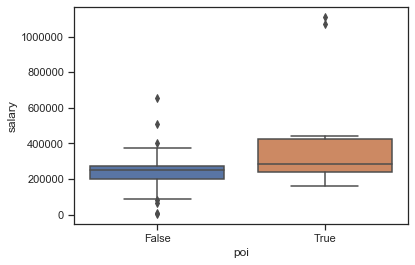

In [95]:
#先看薪資:

average_salary = enron.groupby('poi').mean()['salary']
print(average_salary)

sns.boxplot(x='poi', y='salary', data=enron)

#poi有明顯較高的薪資 >> 好的特徵，可以用!
features_using.append('salary')

poi
False    9.778724e+05
True     1.918182e+06
Name: bonus, dtype: float64


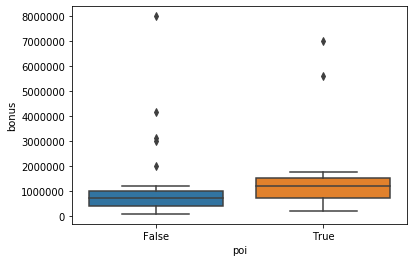

In [65]:
#看看bonus:

average_bonus = enron.groupby('poi').mean()['bonus']
print(average_bonus)

sns.boxplot(x='poi',y='bonus',data=enron)

#poi的bonus較高，但好像有離群值?

In [73]:
# oulier in bonus:

enron[(enron['bonus']>6000000)][['name','salary','bonus',
                                 'exercised_stock_options',
                                 'restricted_stock','total_stock_value','poi']]

,name,salary,bonus,exercised_stock_options,restricted_stock,total_stock_value,poi
8,LAY KENNETH L,1072321.0,7000000.0,34348384.0,14761694.0,49110078.0,True
33,LAVORATO JOHN J,339288.0,8000000.0,4158995.0,1008149.0,5167144.0,False
20,TOTAL,26704229.0,97343619.0,311764000.0,130322299.0,434509511.0,NaN


poi
False    8.345637e+05
True     1.410000e+06
Name: bonus, dtype: float64


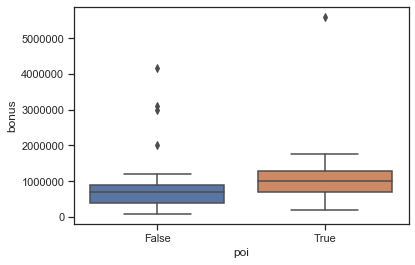

In [96]:
#拿掉離群值對分布狀況影響還好而已

outlier_TakeOut = enron[(enron['bonus']<6000000)][['name','salary','bonus',
                                 'exercised_stock_options',
                                 'restricted_stock','total_stock_value','poi']]

average_bonus2 = outlier_TakeOut.groupby('poi').mean()['bonus']
print(average_bonus2)

sns.boxplot(x='poi',y='bonus',data=outlier_TakeOut)

#去掉離群值之後，poi的bonus仍然顯著較高 >> 好特徵，可用!
features_using.append('bonus')

poi
False    1.462239e+06
True     9.797537e+06
Name: total_payments, dtype: float64


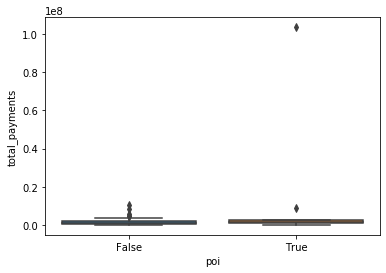

In [68]:
#看看總支付額:

average_TotalPayments = enron.groupby('poi').mean()['total_payments']
print(average_TotalPayments)

sns.boxplot(x='poi',y='total_payments',data=enron)

#這項依然是poi高出許多
#有個超大離群值快突破天際了

In [69]:
enron[(enron['total_payments']>40000000)][['name','total_payments','poi']]

,name,total_payments,poi
8,LAY KENNETH L,103559793.0,True
20,TOTAL,309886585.0,NaN


poi
False    1.462239e+06
True     1.984015e+06
Name: total_payments, dtype: float64


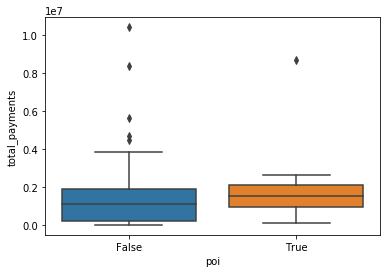

In [76]:
#take Ken Lay out of the poi boxplot

kl_not_in = enron[(enron['total_payments']<40000000)]

average_TotalPayments2 = kl_not_in.groupby('poi').mean()['total_payments']
print(average_TotalPayments2)

sns.boxplot(x='poi',y='total_payments',data=kl_not_in)

#去掉離群值之後好像就差沒多少了 >> 可以不用這個特徵

poi
False    1.736226e+06
True     1.297592e+07
Name: exercised_stock_options, dtype: float64


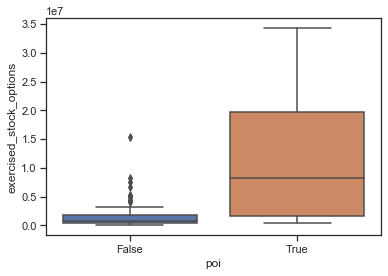

In [97]:
#看看股票期權行使
# Exercise 指的是購買期權從而使期權變成股票
# https://kknews.cc/zh-tw/tech/2aqeyk9.html

Average_OptionValue = enron.groupby('poi').mean()['exercised_stock_options']
print(Average_OptionValue)

sns.boxplot(x='poi',y='exercised_stock_options',data=enron)

#超級顯著的差異 >> 好特徵，該用!!
features_using.append('exercised_stock_options')

poi
False    1.739019e+06
True     1.060641e+07
Name: total_be, dtype: float64


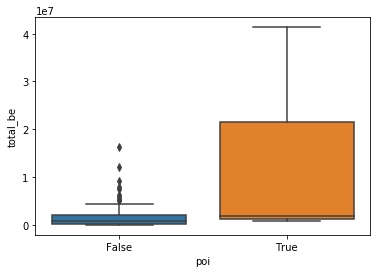

In [79]:
#看看Total Bonus and Exercised Stock Options:

average_total_sbe = enron.groupby('poi').mean()['total_be']
print(average_total_sbe)

sns.boxplot(x='poi',y='total_be',data=enron)

#可能有重複特徵之嫌 >> 不用

poi
False    2.288793e+06
True     1.162399e+07
Name: total_stock_value, dtype: float64


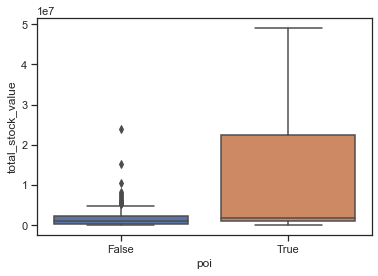

In [98]:
#再看Total Stock Value:

average_stockvalue = enron.groupby('poi').mean()['total_stock_value']
print(average_stockvalue)

sns.boxplot(x='poi',y='total_stock_value',data=enron)

#顯著特徵，可用
features_using.append('total_stock_value')

poi
False     3.159132
True     21.421531
Name: total_millions, dtype: float64


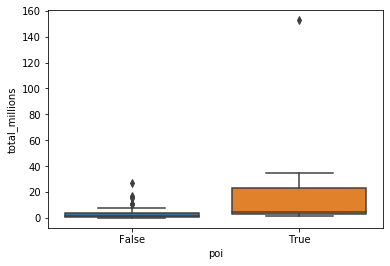

In [81]:
#接著是Total Payments and Stock Value in Millions:

average_total_comp = enron.groupby('poi').mean()['total_millions']
print(average_total_comp)

sns.boxplot(x='poi',y='total_millions',data= enron)

poi
False     3.159132
True     10.484170
Name: total_millions, dtype: float64


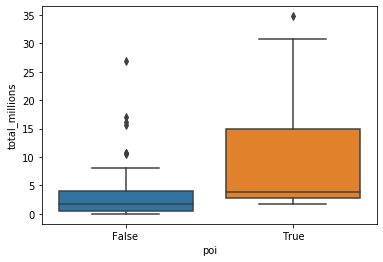

In [83]:
# Let's try that one again without Ken Lay...

kl_not_in = enron[enron['total_millions']<140]

average_total_comp2 = kl_not_in.groupby('poi').mean()['total_millions']
print(average_total_comp2)

sns.boxplot(x='poi',y='total_millions',data= kl_not_in)

#雞肋~~用不用似乎皆可

poi
False    1055.5
True     1459.0
Name: shared_receipt_with_poi, dtype: float64


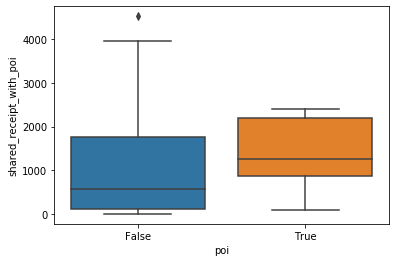

In [84]:
#再來是Shared Receipt with POI:

average_shared_receipt = enron.groupby('poi').mean()['shared_receipt_with_poi']
print(average_shared_receipt)

sns.boxplot(x='poi',y='shared_receipt_with_poi',data= enron)

#不怎麼顯著，不用

poi
False    2181.839286
True     1995.666667
Name: to_messages, dtype: float64


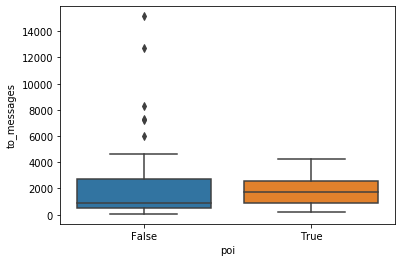

In [85]:
#To Messages:

average_to = enron.groupby('poi').mean()['to_messages']
print(average_to)

sns.boxplot(x='poi',y='to_messages',data= enron)

#不怎麼顯著，不用

poi
False    815.928571
True      60.444444
Name: from_messages, dtype: float64


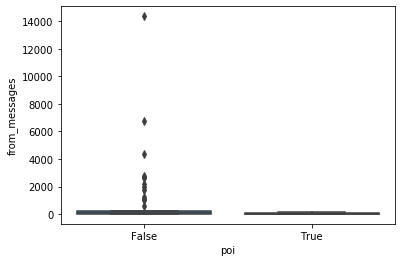

In [86]:
#From Messages:

average_from = enron.groupby('poi').mean()['from_messages']
print(average_from)

sns.boxplot(x='poi',y='from_messages',data= enron)

poi
False    569.527273
True      60.444444
Name: from_messages, dtype: float64


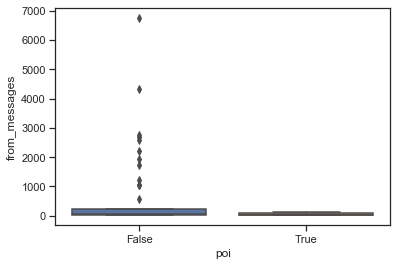

In [99]:
outlier_takeOut = enron[enron['from_messages']<14000]

average_from2 = outlier_takeOut.groupby('poi').mean()['from_messages']
print(average_from2)

sns.boxplot(x='poi',y='from_messages',data= outlier_takeOut)

#差蠻多的，可用~~
features_using.append('from_messages')

poi
False    0.130899
True     0.328700
Name: fraction_to_poi, dtype: float64


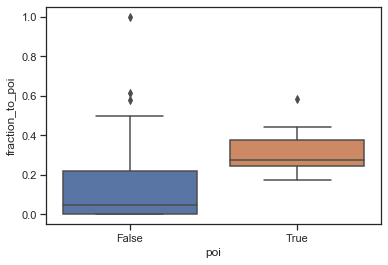

In [100]:
#Fraction to POI:

average_fraction_to = enron.groupby('poi').mean()['fraction_to_poi']
print(average_fraction_to)

sns.boxplot(x='poi',y='fraction_to_poi',data= enron)

#又一個可用的特徵~~

features_using.append('fraction_to_poi')

poi
False    0.034720
True     0.053177
Name: fraction_from_poi, dtype: float64


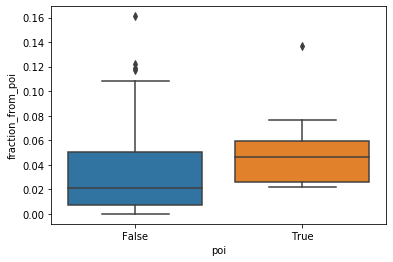

In [90]:
#Fraction from POI:

average_fraction_from = enron.groupby('poi').mean()['fraction_from_poi']
print(average_fraction_from)

sns.boxplot(x='poi',y='fraction_from_poi',data= enron)

#差不多，不用吧

In [101]:
# 最後決定有哪些可以用的特徵:
features_using

['salary',
 'bonus',
 'exercised_stock_options',
 'total_stock_value',
 'from_messages',
 'fraction_to_poi']

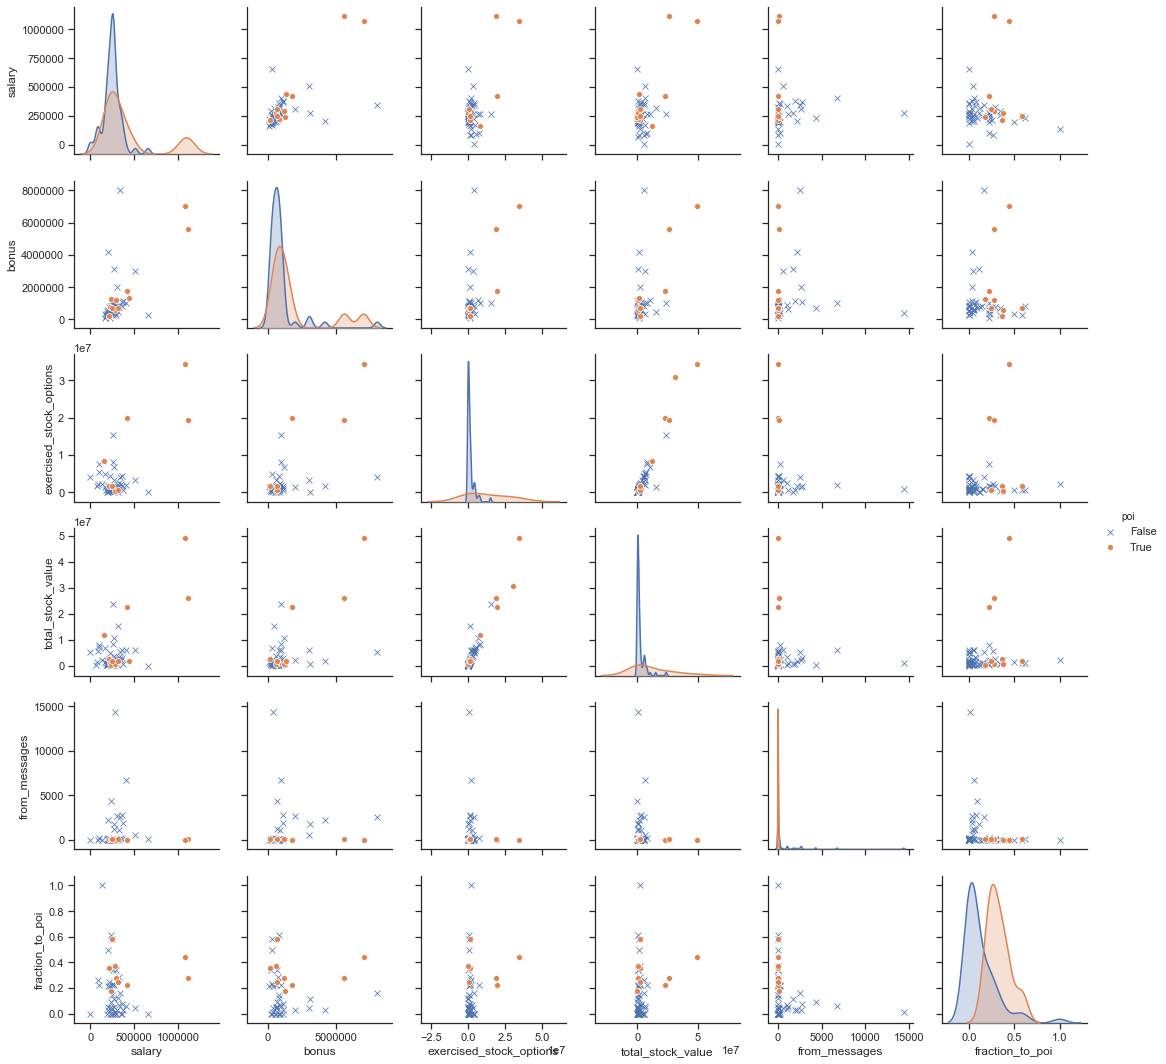

In [102]:
# Pairplot Analysis

import seaborn as sns

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(enron, vars=features_using,
                 dropna=True, diag_kind='kde',
                 hue='poi', markers=['x','o'])

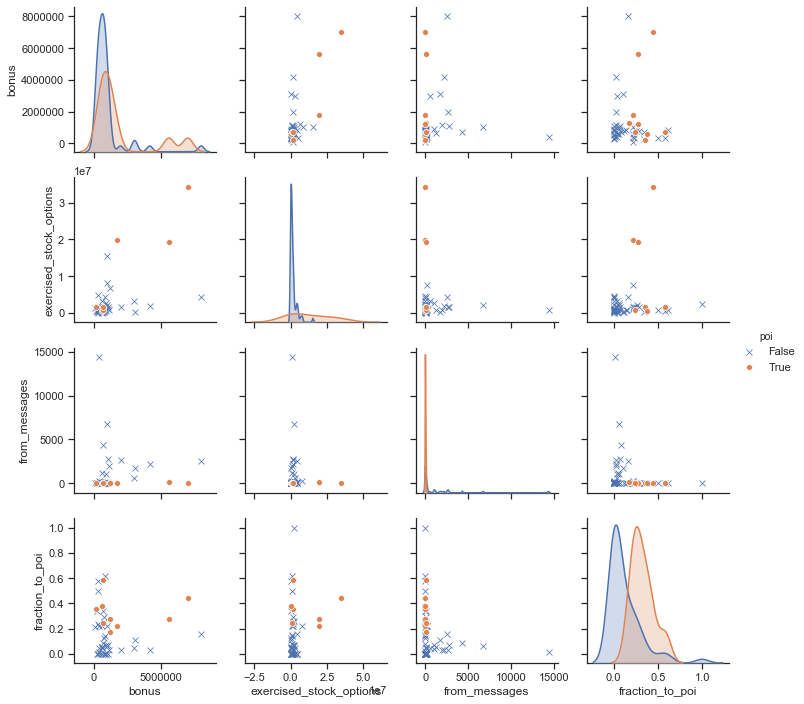

In [91]:
# Pairplot Analysis

import seaborn as sns

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(enron, vars=['bonus','exercised_stock_options',
                              'from_messages','fraction_to_poi'],
                 dropna=True, diag_kind='kde', hue='poi', markers=['x','o'])

In [141]:
x = enron.columns
#x

features_full_list = x.tolist()
len(features_full_list)

26

In [142]:
features_full_list.remove('name')#take out 'name'
features_full_list.remove('email_address') #take out 'email_address'
features_full_list.remove('loan_advances') #take out 'loan_advances' because of missing values
features_full_list.remove('director_fees')#take out 'director_fees' because of missing values
features_full_list.remove('poi') #take out 'poi' for now and add to beginning of list
features_list = ['poi']

for n in features_full_list:
    features_list.append(n)

print(features_list)
len(features_list)

['poi', 'bonus', 'deferral_payments', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value', 'total_be', 'total_millions', 'fraction_to_poi', 'fraction_from_poi']


22

In [150]:
enron[enron['name']=='LOCKHART EUGENE E']=None
enron[enron['name']=='LOCKHART EUGENE E']

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_be,total_millions,fraction_to_poi,fraction_from_poi


In [ ]:
# 離群值處理:


In [ ]:
# 遺失值填補:

In [ ]:
# STEP4:特徵工程

In [10]:
# 將資料最大最小化
from sklearn.preprocessing import MinMaxScaler
df = MinMaxScaler().fit_transform(df)

# STEP5:使用模型

In [11]:
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

In [12]:
print(df.shape)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test.shape)

(146, 19)
(113, 19)
(33, 19)
(113,)
(33, 20)


In [13]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 讀取資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
#x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=20, max_depth=4, oob_score=True)

# 訓練模型
clf.fit(train_X, train_Y)

# 預測測試集
y_pred = clf.predict_proba(test_X)[:,1]

#acc = metrics.accuracy_score(test, y_pred)
#print("Accuracy: ", acc)

print(y_pred)

[0.21502592 0.29680638 0.40022305 0.15684851 0.46349843 0.21347305
 0.73525641 0.05256949 0.05599756 0.04104581 0.02582579 0.00256949
 0.01029008 0.00256949 0.32274484 0.00256949 0.03297855 0.31162351
 0.14104631 0.00824176 0.88125    0.47651235 0.01449115 0.05888672
 0.01097855 0.01812891 0.10888672 0.00461031 0.19026408 0.40643606
 0.00971235 0.04292546 0.37140345]


In [14]:
sub = pd.DataFrame({'name': ids, 'poi': y_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('EnronFraud_rf2.csv', index=False)

In [16]:
# check:
sub = pd.read_csv('C:/Users/USER/Desktop/Github/ML100Days/Midtern Exam_Kaggle_Project/EnronFraud_rf2.csv')
sub

,name,poi
0,BELDEN TIMOTHY N,0
1,BOWEN JR RAYMOND M,0
2,HANNON KEVIN P,0
3,DELAINEY DAVID W,0
4,CAUSEY RICHARD A,0
5,HICKERSON GARY J,0
6,FREVERT MARK A,1
7,CHAN RONNIE,0
8,DONAHUE JR JEFFREY M,0
9,REYNOLDS LAWRENCE,0


# 0.46428